In [1]:
import pandas as pd

In [41]:
TTC_Delay_BUS = pd.read_excel('ttc-bus-delay-data-2024.xlsx')
TTC_Delay_BUS

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2024-01-01,89,02:08,Monday,KEELE AND GLENLAKE,Vision,10,20,N,7107
1,2024-01-01,39,02:30,Monday,FINCH STATION,General Delay,20,40,NaN,8914
2,2024-01-01,300,03:13,Monday,BLOOR AND MANNING,General Delay,0,0,NaN,8562
3,2024-01-01,65,03:23,Monday,PARLIAMENT AND BLOOR,Security,0,0,N,8574
4,2024-01-01,113,03:37,Monday,MAIN STATION,Security,0,0,NaN,8541
...,...,...,...,...,...,...,...,...,...,...
54604,2024-11-30,927,01:05,Saturday,ARROW GARAGE,Operations - Operator,20,40,NaN,0
54605,2024-11-30,904,01:13,Saturday,PROGRESS AND MIDLAND,Operations - Operator,7,14,W,9047
54606,2024-11-30,105,01:14,Saturday,SHEPPARD WEST STATION,Emergency Services,0,0,S,7104
54607,2024-11-30,36,01:19,Saturday,HUMBERWOOD BLVD AND MO,Emergency Services,15,29,S,3627


In [42]:
len(TTC_Delay_BUS[TTC_Delay_BUS['Min Delay']==0])/len(TTC_Delay_BUS)

0.1135160870918713

In [43]:
TTC_Delay_BUS = TTC_Delay_BUS[TTC_Delay_BUS['Min Delay']>0]
TTC_Delay_BUS

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2024-01-01,89,02:08,Monday,KEELE AND GLENLAKE,Vision,10,20,N,7107
1,2024-01-01,39,02:30,Monday,FINCH STATION,General Delay,20,40,NaN,8914
5,2024-01-01,320,03:40,Monday,YONGE AND QUEENSQUAY,Operations - Operator,8,16,N,8192
6,2024-01-01,171,04:00,Monday,MOUNT DENNIS GARAGE,General Delay,20,20,S,1402
7,2024-01-01,12,04:02,Monday,VICTORIA PARK AND DANF,Emergency Services,21,42,N,8616
...,...,...,...,...,...,...,...,...,...,...
54603,2024-11-30,133,00:45,Saturday,KENNEDY STATION,Utilized Off Route,25,50,NaN,1579
54604,2024-11-30,927,01:05,Saturday,ARROW GARAGE,Operations - Operator,20,40,NaN,0
54605,2024-11-30,904,01:13,Saturday,PROGRESS AND MIDLAND,Operations - Operator,7,14,W,9047
54607,2024-11-30,36,01:19,Saturday,HUMBERWOOD BLVD AND MO,Emergency Services,15,29,S,3627


In [44]:
import pandas as pd

# Ensure 'Date' is in datetime format
TTC_Delay_BUS.loc[:, 'Date'] = pd.to_datetime(TTC_Delay_BUS['Date'])

# Create the 'Weekday' column (0=Monday, 6=Sunday)
TTC_Delay_BUS.loc[:, 'Weekday'] = TTC_Delay_BUS['Date'].dt.day_name()

# Create the 'Month' column (1=January, 12=December)
TTC_Delay_BUS.loc[:, 'Month'] = TTC_Delay_BUS['Date'].dt.month_name()

# Create the 'Season' column (based on month ranges)
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

TTC_Delay_BUS.loc[:, 'Season'] = TTC_Delay_BUS['Month'].apply(get_season)

# Create the 'Time of Day' column based on the 'Time' column
# First, ensure 'Time' is in datetime format
TTC_Delay_BUS.loc[:, 'Time'] = pd.to_datetime(TTC_Delay_BUS['Time'], format='%H:%M').dt.time



# Display the updated DataFrame
TTC_Delay_BUS

/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_37367/1580831625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTC_Delay_BUS.loc[:, 'Weekday'] = TTC_Delay_BUS['Date'].dt.day_name()
/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_37367/1580831625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTC_Delay_BUS.loc[:, 'Month'] = TTC_Delay_BUS['Date'].dt.month_name()
/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_37367/1580831625.py:23: SettingWithCopyWarning: 
A value

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Weekday,Month,Season
0,2024-01-01,89,02:08:00,Monday,KEELE AND GLENLAKE,Vision,10,20,N,7107,Monday,January,Winter
1,2024-01-01,39,02:30:00,Monday,FINCH STATION,General Delay,20,40,NaN,8914,Monday,January,Winter
5,2024-01-01,320,03:40:00,Monday,YONGE AND QUEENSQUAY,Operations - Operator,8,16,N,8192,Monday,January,Winter
6,2024-01-01,171,04:00:00,Monday,MOUNT DENNIS GARAGE,General Delay,20,20,S,1402,Monday,January,Winter
7,2024-01-01,12,04:02:00,Monday,VICTORIA PARK AND DANF,Emergency Services,21,42,N,8616,Monday,January,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54603,2024-11-30,133,00:45:00,Saturday,KENNEDY STATION,Utilized Off Route,25,50,NaN,1579,Saturday,November,Fall
54604,2024-11-30,927,01:05:00,Saturday,ARROW GARAGE,Operations - Operator,20,40,NaN,0,Saturday,November,Fall
54605,2024-11-30,904,01:13:00,Saturday,PROGRESS AND MIDLAND,Operations - Operator,7,14,W,9047,Saturday,November,Fall
54607,2024-11-30,36,01:19:00,Saturday,HUMBERWOOD BLVD AND MO,Emergency Services,15,29,S,3627,Saturday,November,Fall


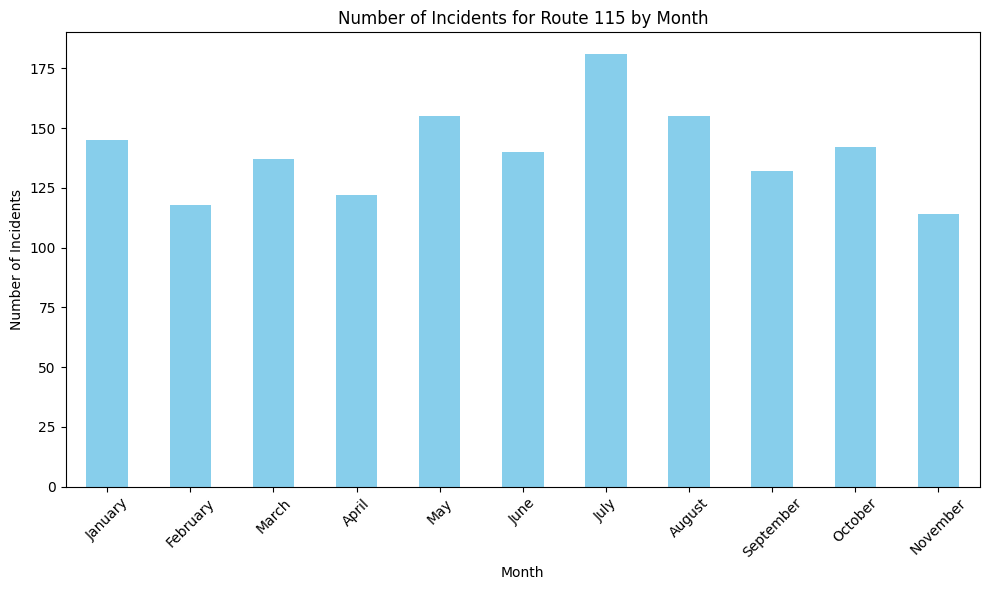

In [59]:
import matplotlib.pyplot as plt

# Filter the DataFrame for Route 41
route_41_data = TTC_Delay_BUS[TTC_Delay_BUS['Route'] == 32]

# Count the number of occurrences for each Month
date_counts = route_41_data.groupby('Month').size()

# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

# Reindex the counts to ensure the months are sorted correctly
date_counts = date_counts.reindex(month_order)

# Plot the result
plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Incidents for Route 115 by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
route_count = TTC_Delay_BUS.groupby('Route').size().reset_index(name='Incident Count')

route_count_sorted = route_count.sort_values(by='Incident Count', ascending=False)

# Display the sorted result
route_count_sorted.head(40)



,Route,Incident Count
26,32,1541
46,52,1452
30,36,1329
29,35,1189
23,29,1172
56,63,971
88,95,901
95,102,894
78,85,864
48,54,786
